# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = None

# Clean data
df = None


def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv")
df.set_index("date", inplace=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
# Clean data
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df
 

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


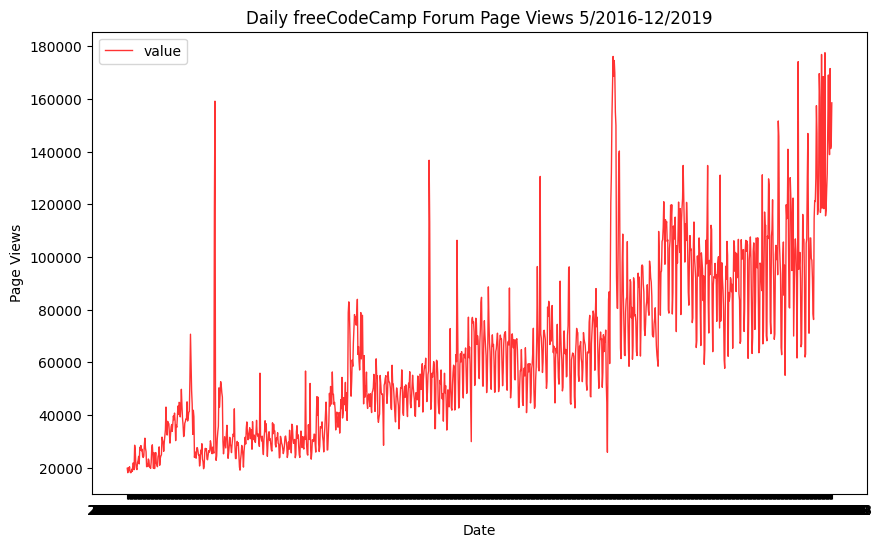

In [4]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.plot(df.index, df["value"], color = "red", linewidth = 1, alpha = 0.8, label = "value")
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.legend(loc = "upper left")
    
    





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()
plt.show()

In [5]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.bar(df["value"], hue = df.index, linewidth = 1, alpha = 0.8)
    ax.set_title("Daily page views over time")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    ax.legend(loc = "upper left")

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()
plt.show()




AttributeError: 'Index' object has no attribute 'year'

In [ ]:
df_bar = df.copy()
df_bar["year"] = pd.to_datetime(df_bar.index).dt.year
df_bar

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

C:\Users\Henry Kwakye\AppData\Local\Temp\ipykernel_17496\1054363344.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()


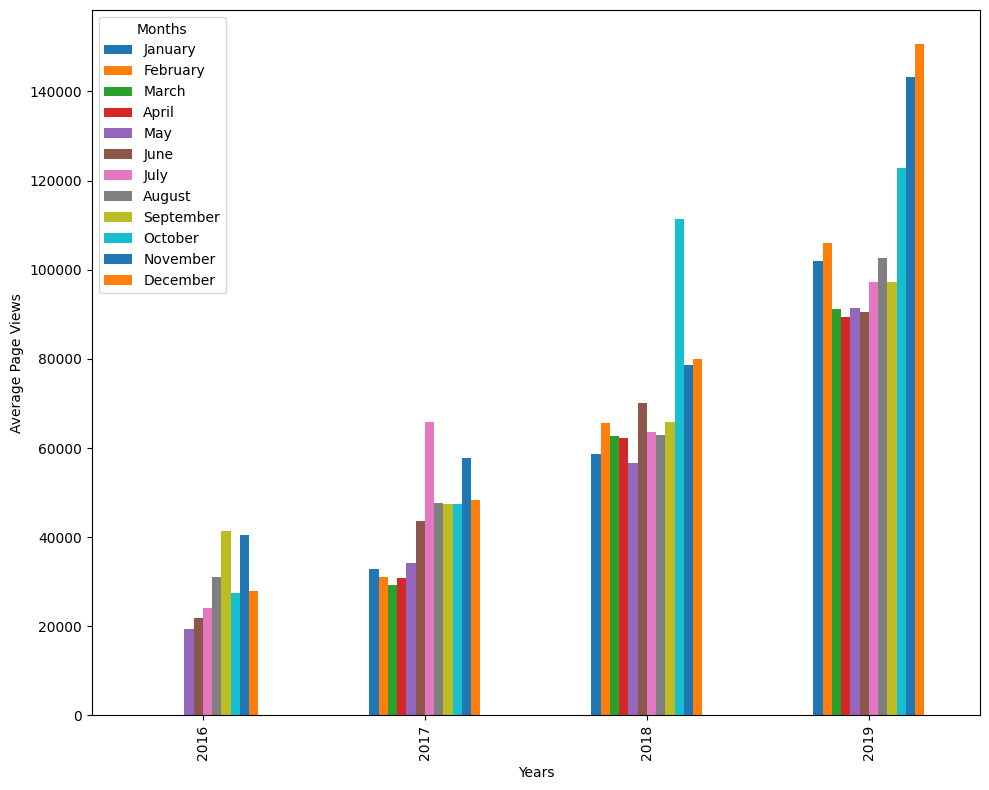

In [7]:
def draw_bar_plot():
    # Copy and prepare data
    df_bar = df.copy()
    df_bar.index = pd.to_datetime(df_bar.index)  # Ensure datetime index
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')

    # Sort months chronologically
    months_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=months_order, ordered=True)

    # Group data
    df_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Plot
    fig = plt.figure(figsize=(10, 8))
    ax = df_grouped.plot(kind='bar', ax=plt.gca())
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months')
    plt.tight_layout()

    # Save and return
    fig.savefig('bar_plot.png')
    return fig

# Call the function
draw_bar_plot()
plt.show()


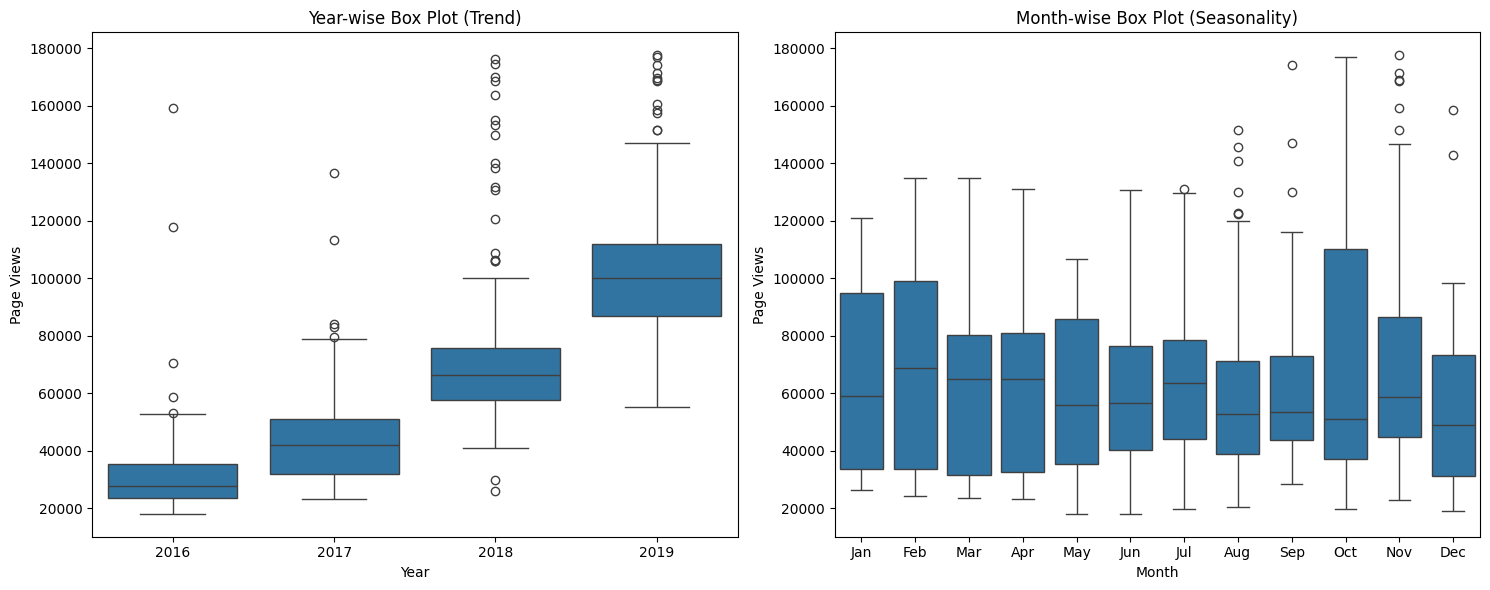

In [ ]:
def draw_box_plot():
    # Prepare data
    df_box = df.copy()
    df_box.reset_index(inplace=True)

    # Convert 'date' column to datetime
    df_box['date'] = pd.to_datetime(df_box['date'])

    # Create new columns
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')
    df_box['month_num'] = df_box['date'].dt.month

    # Sort by actual month order
    df_box = df_box.sort_values('month_num')

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    fig.tight_layout()
    fig.savefig('box_plot.png')
    return fig

# Call the function
draw_box_plot()
plt.show()
